In [ ]:
!git clone https://github.com/doriguzzi/lucid-ddos.git

Cloning into 'lucid-ddos'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 86 (delta 51), reused 53 (delta 23), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [ ]:
!pip install ipython-autotime
!pip install pyshark
!apt-get install tshark

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [ ]:
cd /content/drive/MyDrive/"Colab Notebooks"/lucid-ddos/

/content/drive/MyDrive/Colab Notebooks/lucid-ddos


In [ ]:
#Preprocess with new datasets
!python lucid_dataset_parser.py --dataset_type DOS2019 --dataset_folder ./CIC2019_PCAP/ --packets_per_flow 10 --dataset_id DOS2019 --traffic_type all --time_window 10
!python lucid_dataset_parser.py --preprocess_folder ./CIC2019_PCAP/

Processing file:  SAT-03-11-2018_067.pcap
Processing file:  SAT-03-11-2018_010.pcap
Processing file:  SAT-03-11-2018_0145.pcap
Processing file:  SAT-03-11-2018_0_0.pcap
SAT-03-11-2018_010.pcap packet # 0
SAT-03-11-2018_067.pcap packet # 0
SAT-03-11-2018_0145.pcap packet # 0
SAT-03-11-2018_0_0.pcap packet # 0
SAT-03-11-2018_010.pcap packet # 1000
SAT-03-11-2018_067.pcap packet # 1000
SAT-03-11-2018_0_0.pcap packet # 1000
SAT-03-11-2018_0145.pcap packet # 1000
SAT-03-11-2018_010.pcap packet # 2000
SAT-03-11-2018_067.pcap packet # 2000
SAT-03-11-2018_0_0.pcap packet # 2000
SAT-03-11-2018_0145.pcap packet # 2000
SAT-03-11-2018_010.pcap packet # 3000
SAT-03-11-2018_067.pcap packet # 3000
SAT-03-11-2018_010.pcap packet # 4000
SAT-03-11-2018_0_0.pcap packet # 3000
SAT-03-11-2018_0145.pcap packet # 3000
SAT-03-11-2018_067.pcap packet # 4000
SAT-03-11-2018_010.pcap packet # 5000
SAT-03-11-2018_0_0.pcap packet # 4000
SAT-03-11-2018_0145.pcap packet # 4000
SAT-03-11-2018_067.pcap packet # 5000
SA

In [ ]:
#Train on new datasets
!python lucid_cnn.py --train ./CIC2019_PCAP/  --epochs 100 --regularization l1 --dropout 0.5

Streaming output truncated to the last 5000 lines.
Epoch: 65/100
16/16 - 0s - loss: 0.4827 - accuracy: 0.8325 - val_loss: 0.4636 - val_accuracy: 0.9580 - 93ms/epoch - 6ms/step
Epoch: 66/100
16/16 - 0s - loss: 0.4844 - accuracy: 0.8283 - val_loss: 0.4606 - val_accuracy: 0.9580 - 93ms/epoch - 6ms/step
Epoch: 67/100
16/16 - 0s - loss: 0.4795 - accuracy: 0.8318 - val_loss: 0.4575 - val_accuracy: 0.9580 - 112ms/epoch - 7ms/step
Epoch: 68/100
16/16 - 0s - loss: 0.4787 - accuracy: 0.8310 - val_loss: 0.4546 - val_accuracy: 0.9635 - 105ms/epoch - 7ms/step
Epoch: 69/100
16/16 - 0s - loss: 0.4763 - accuracy: 0.8320 - val_loss: 0.4516 - val_accuracy: 0.9635 - 98ms/epoch - 6ms/step
Epoch: 70/100
16/16 - 0s - loss: 0.4749 - accuracy: 0.8308 - val_loss: 0.4487 - val_accuracy: 0.9649 - 99ms/epoch - 6ms/step
Epoch: 71/100
16/16 - 0s - loss: 0.4701 - accuracy: 0.8346 - val_loss: 0.4458 - val_accuracy: 0.9649 - 94ms/epoch - 6ms/step
Epoch: 72/100
16/16 - 0s - loss: 0.4712 - accuracy: 0.8312 - val_loss: 0

In [ ]:
#Predict on CICDDoS2019 dataset
!python lucid_cnn.py --predict ./CIC2019_PCAP/ --model ./CIC2019_PCAP/10t-10n-DOS2019-LUCID.h5

2022-06-14 08:57:33.540124: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model         TIME(sec) PACKETS SAMPLES DDOS% ACC    ERR    F1     PPV    TPR    FPR    TNR    FNR    Data Source
DOS2019-LUCID     0.057 0015791 0004038 0.506 0.9968 0.1112 0.9968 0.9985 0.9951 0.0015 0.9985 0.0049 10t-10n-DOS2019-dataset-test.hdf5



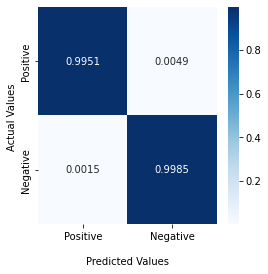

In [ ]:
# manually input the confusion matrix value & plot
import seaborn as sns
import matplotlib.pyplot as plt

array = [[0.9951, 0.0049], 
        [0.0015,0.9985]]

plt.figure(figsize = (4,4))
lucid_map = sns.heatmap(array, annot=True, cmap='Blues', fmt='g')

# Config map display
lucid_map.set_xlabel('\nPredicted Values')
lucid_map.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
lucid_map.xaxis.set_ticklabels(['Positive','Negative'])
lucid_map.yaxis.set_ticklabels(['Positive','Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
!cat /proc/cpuinfo
!cat /proc/meminfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b